In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import openpyxl

In [4]:
sns.set_theme(style="darkgrid")

Get the CSV file in and check the header what it looks like

In [5]:
data_dir = 'd:\\Programming\\PowerBI\\FinlandEmissions2023\\Data\\'
main_file = 'Finland_emissions_2023.csv'
print(data_dir + main_file + " " + os.getcwd())
df = pd.read_csv(data_dir + main_file)

df.head(10)

d:\Programming\PowerBI\FinlandEmissions2023\Data\Finland_emissions_2023.csv d:\Programming\PowerBI\FinlandEmissions2023\Python


,Year,Emission category,Greenhouse gas,"Emission, thousand tonnes of CO2 eq. (GWP=AR5)"
0,1990,Emissions without LULUCF,Total,71331
1,1990,Emissions without LULUCF,Carbon dioxide (CO2),57086
2,1990,Emissions without LULUCF,Methane (CH4),8624
3,1990,Emissions without LULUCF,Nitrous oxide (N2O),5567
4,1990,Emissions without LULUCF,F-gases (HFCs+PFCs+SF6),54
5,1990,Emissions without LULUCF,Hydrofluorocarbons (HFCs),0
6,1990,Emissions without LULUCF,Perfluorocarbons (PFCs),0
7,1990,Emissions without LULUCF,Sulfur hexafluoride (SF6),54
8,1990,Emissions with LULUCF,Total,48156
9,1990,Emissions with LULUCF,Carbon dioxide (CO2),30720


Checking the imported types for conversion to more appropriate types

In [6]:
df.dtypes

Year                                              object
Emission category                                 object
Greenhouse gas                                    object
Emission, thousand tonnes of CO2 eq. (GWP=AR5)    object
dtype: object

In [7]:
df.loc[df['Year'] == "2023*"]

,Year,Emission category,Greenhouse gas,"Emission, thousand tonnes of CO2 eq. (GWP=AR5)"
31152,2023*,Emissions without LULUCF,Total,40629
31153,2023*,Emissions without LULUCF,Carbon dioxide (CO2),31673
31154,2023*,Emissions without LULUCF,Methane (CH4),4397
31155,2023*,Emissions without LULUCF,Nitrous oxide (N2O),3833
31156,2023*,Emissions without LULUCF,F-gases (HFCs+PFCs+SF6),727
...,...,...,...,...
32091,2023*,Indirect CO2 emission,Nitrous oxide (N2O),-
32092,2023*,Indirect CO2 emission,F-gases (HFCs+PFCs+SF6),-
32093,2023*,Indirect CO2 emission,Hydrofluorocarbons (HFCs),-
32094,2023*,Indirect CO2 emission,Perfluorocarbons (PFCs),-


In [8]:
df.rename(columns={"Emission, thousand tonnes of CO2 eq. (GWP=AR5)": "Emission CO2 equiv"}, inplace=True)

# Do preparations for the data to be able to convert certain columns to numeric
df["Year"]  = df["Year"].str.replace("2023*", "2023") 
df.loc[df['Emission CO2 equiv'] == "-"] = 0
df.loc[df['Emission CO2 equiv'] == ","] = 0
df.loc[df['Emission CO2 equiv'] == "."] = 0

In [9]:
df.head(10)

,Year,Emission category,Greenhouse gas,Emission CO2 equiv
0,1990,Emissions without LULUCF,Total,71331
1,1990,Emissions without LULUCF,Carbon dioxide (CO2),57086
2,1990,Emissions without LULUCF,Methane (CH4),8624
3,1990,Emissions without LULUCF,Nitrous oxide (N2O),5567
4,1990,Emissions without LULUCF,F-gases (HFCs+PFCs+SF6),54
5,1990,Emissions without LULUCF,Hydrofluorocarbons (HFCs),0
6,1990,Emissions without LULUCF,Perfluorocarbons (PFCs),0
7,1990,Emissions without LULUCF,Sulfur hexafluoride (SF6),54
8,1990,Emissions with LULUCF,Total,48156
9,1990,Emissions with LULUCF,Carbon dioxide (CO2),30720


In [10]:
# Convert relevant columns to numbers
df[['Year', 'Emission CO2 equiv']] = df[['Year', 'Emission CO2 equiv']].apply(pd.to_numeric)

# Drop rows with all zeros
df = df.loc[(df!=0).any(axis=1)]

# Dig out the main categories of emissions
main_categories = df[df['Greenhouse gas'].str.contains('Total') & df['Emission category'].str.contains(r'^[1-5]\s')]["Emission category"].unique()
main_category_names = [x.split(" ", 1)[1] for x in main_categories]
d = {"Category": ["No cat"] + main_category_names, "Original": ["No cat"] + main_categories.tolist()}
main_categories_df = pd.DataFrame(data=d)
main_categories_df.set_index(np.arange(0, main_categories.shape[0] + 1), inplace=True)

print("Main categories: ")
print(main_categories_df)


Main categories: 
                                          Category  \
0                                           No cat   
1                                           Energy   
2             Industrial processes and product use   
3                                      Agriculture   
4  Land use, land-use change and forestry (LULUCF)   
5                                 Waste management   

                                            Original  
0                                             No cat  
1                                           1 Energy  
2             2 Industrial processes and product use  
3                                      3 Agriculture  
4  4 Land use, land-use change and forestry (LULUCF)  
5                                 5 Waste management  


In [11]:

# Add a column for the main category to reference to the main category table
s1 = pd.Series(df['Emission category'].str.contains(r'^[1-5]\w*\s'))
df["main category"] = df.loc[s1]["Emission category"].apply(lambda x: int(x[0]))
df["main category"] = df["main category"].fillna(0, downcast='int')

# Dig out the LULUCF emissions data and remove it from the main table
lulucf_index = df['Emission category'].str.contains(r'with(?:out)?\sLULUCF')
df_lulucf = df[lulucf_index]
df_lulucf.set_index(np.arange(0, df_lulucf.shape[0]), inplace=True)
df = df[~lulucf_index]
df.set_index(np.arange(0, df.shape[0]), inplace=True)

print("LULUCF")
print(df_lulucf.head(10))

main_categories_df.to_excel(data_dir + "Finland_emissions_2023_main_categories.xlsx")
df.to_excel(data_dir + "Finland_emissions_2023_cleaned.xlsx")
df_lulucf.to_excel(data_dir + "Finland_emissions_2023_LULUCF.xlsx")


LULUCF
   Year         Emission category             Greenhouse gas  \
0  1990  Emissions without LULUCF                      Total   
1  1990  Emissions without LULUCF       Carbon dioxide (CO2)   
2  1990  Emissions without LULUCF              Methane (CH4)   
3  1990  Emissions without LULUCF        Nitrous oxide (N2O)   
4  1990  Emissions without LULUCF    F-gases (HFCs+PFCs+SF6)   
5  1990  Emissions without LULUCF  Hydrofluorocarbons (HFCs)   
6  1990  Emissions without LULUCF    Perfluorocarbons (PFCs)   
7  1990  Emissions without LULUCF  Sulfur hexafluoride (SF6)   
8  1990     Emissions with LULUCF                      Total   
9  1990     Emissions with LULUCF       Carbon dioxide (CO2)   

   Emission CO2 equiv  main category  
0               71331              0  
1               57086              0  
2                8624              0  
3                5567              0  
4                  54              0  
5                   0              0  
6              

C:\Users\jr\AppData\Local\Temp\ipykernel_66468\2527822184.py:4: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df["main category"] = df["main category"].fillna(0, downcast='int')


Plot LULUCF data in a bar chart for checking the data

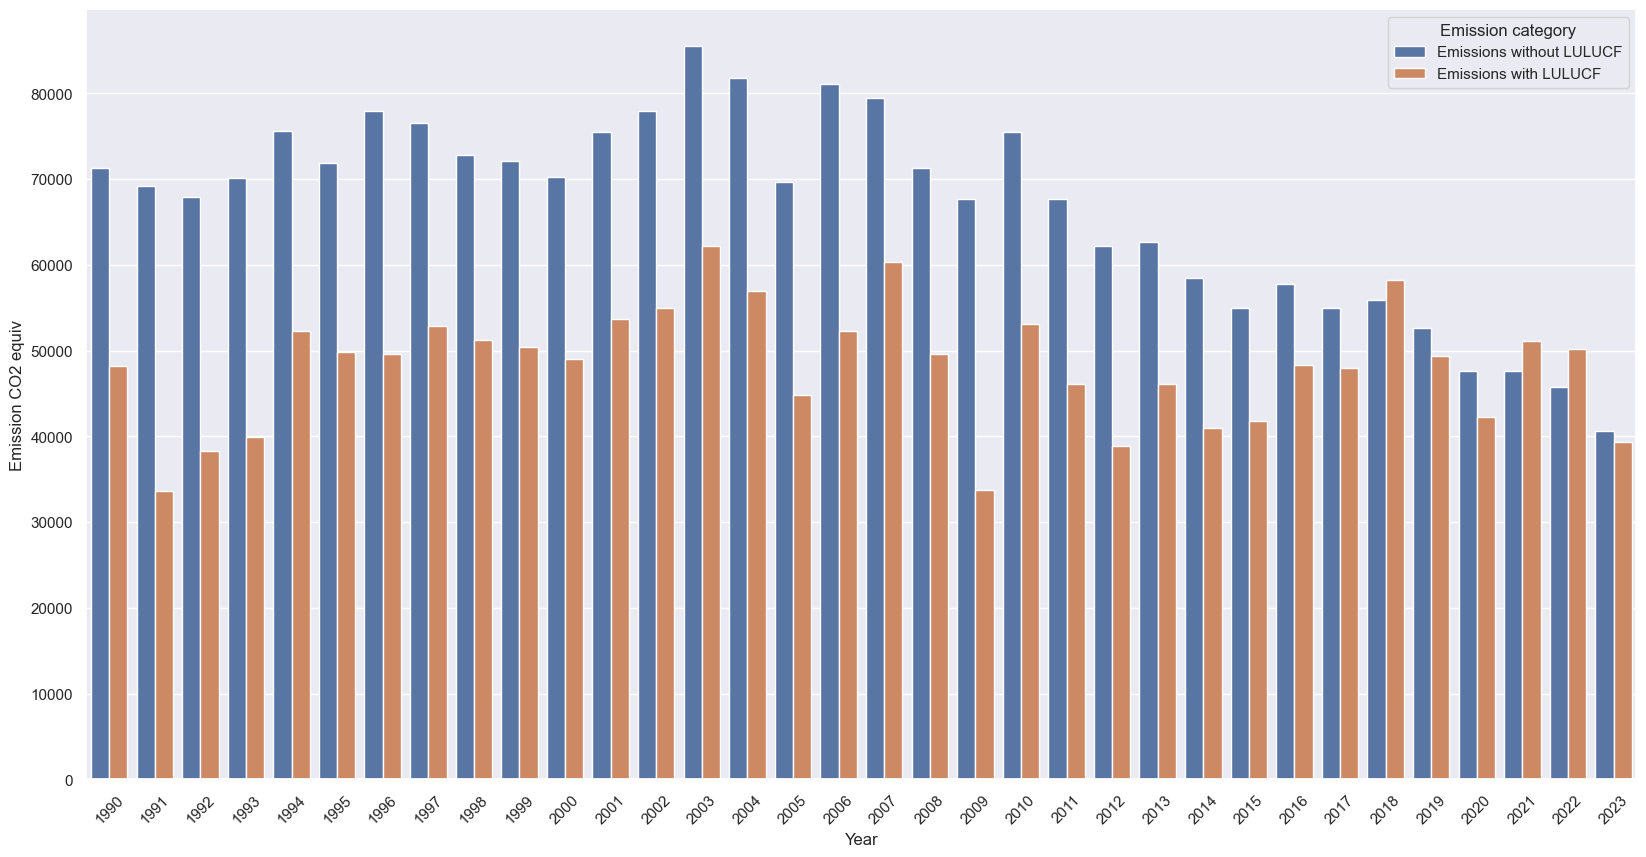

In [12]:
plt.figure(figsize=(20, 10))
bplot = sns.barplot(x='Year', y='Emission CO2 equiv', hue='Emission category', data=df_lulucf.loc[df_lulucf['Greenhouse gas'] == 'Total'] )
plt.setp(bplot.get_xticklabels(), rotation=45)
plt.show()

In [13]:
df_totals = df[df['Greenhouse gas'].str.contains('Total')]
df_totals = df_totals[['Year', 'Emission category', 'Emission CO2 equiv', "main category"]]
df_totals.set_index(np.arange(0, df_totals.shape[0]), inplace=True)
df_totals.to_excel(data_dir + "Finland_emissions_2023_totals.xlsx")
#df_totals_main.loc["Emission category"] = df_totals_main["Emission category"].str.replace(r'^[1-5]\s', '')
df_totals.head(5)

,Year,Emission category,Emission CO2 equiv,main category
0,1990,1 Energy,53420,1
1,1990,1A1 Energy industries,18958,1
2,1990,1A2 Manufacturing industries and construction,13358,1
3,1990,1A2(-1A2gvii) Manufacturing industries and con...,12414,0
4,1990,1A2gvii Off-road vehicles and other machinery ...,944,1


Plot main emission category data in a bar chart for checking the data

<Axes: xlabel='Year'>

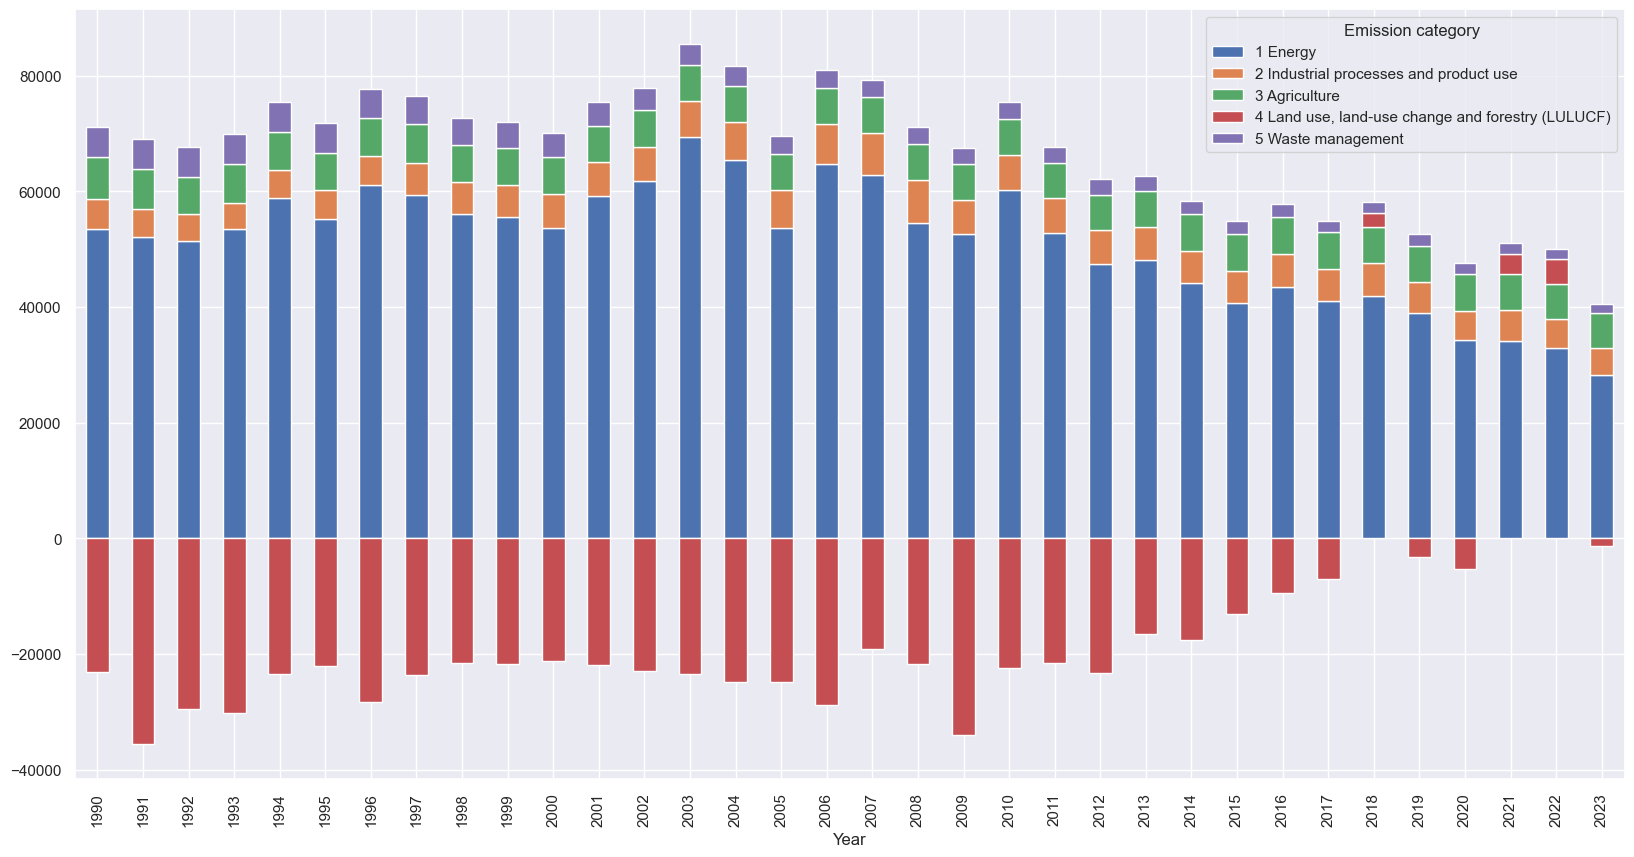

In [14]:
df_totals_main = df_totals[df_totals['Emission category'].str.contains(r'^[1-5]\s')]
df_totals_main.set_index(np.arange(0, df_totals_main.shape[0]), inplace=True)
df_totals_main.to_excel(data_dir + "Finland_emissions_2023_totals_main.xlsx")
df_totals_main.pivot(index=['Year'], columns=['Emission category'], values='Emission CO2 equiv').plot(kind='bar', stacked=True, figsize=(20,10))

In [15]:
df_totals_main.head(5)

,Year,Emission category,Emission CO2 equiv,main category
0,1990,1 Energy,53420,1
1,1990,2 Industrial processes and product use,5223,2
2,1990,3 Agriculture,7315,3
3,1990,"4 Land use, land-use change and forestry (LULUCF)",-23175,4
4,1990,5 Waste management,5208,5


In [91]:
landuse = df_totals_main['Emission category'].str.contains("land-use")
df_total_no_land = df_totals_main[~landuse].groupby('Year')['Emission CO2 equiv'].sum()
df_total_no_land.head(5)

Year
1990    71166
1991    69093
1992    67721
1993    69936
1994    75506
Name: Emission CO2 equiv, dtype: int64

In [99]:
index = df_lulucf["Emission category"].str.contains("without")
df_lulu_total = df_lulucf[index & (df_lulucf["Greenhouse gas"] == "Total")]
df_lulu_total.set_index(np.arange(0, df_lulu_total.shape[0]), inplace=True)
df_lulu_total.head(5)

,Year,Emission category,Greenhouse gas,Emission CO2 equiv,main category
0,1990,Emissions without LULUCF,Total,71331,0
1,1991,Emissions without LULUCF,Total,69247,0
2,1992,Emissions without LULUCF,Total,67869,0
3,1993,Emissions without LULUCF,Total,70077,0
4,1994,Emissions without LULUCF,Total,75646,0


In [100]:
df_lulu_total["Emission CO2 equiv"] - df_total_no_land.values

0     165
1     154
2     148
3     141
4     140
5     131
6     117
7     115
8     113
9     110
10    106
11    107
12     97
13     97
14     94
15     87
16     88
17     89
18     80
19     71
20     68
21     66
22     63
23     60
24     57
25     56
26     56
27     56
28     55
29     55
30     67
31     58
32     51
33     50
Name: Emission CO2 equiv, dtype: int64

In [104]:
df_energy = df_totals[df_totals['main category'] == 1]
df_energy = df_energy[["Emission category", "Emission CO2 equiv", "Year"]]
df_energy.set_index(np.arange(0, df_energy.shape[0]), inplace=True)
df_energy[df_energy["Year"] == 2023]


,Emission category,Emission CO2 equiv,Year
825,1 Energy,28248,2023
826,1A1 Energy industries,9645,2023
827,1A2 Manufacturing industries and construction,5289,2023
828,1A2gvii Off-road vehicles and other machinery ...,1105,2023
829,1A3 Transport,9392,2023
830,1A3a Domestic aviation,136,2023
831,1A3b Road transportation,8879,2023
832,1A3c Railways,58,2023
833,1A3d Domestic navigation,318,2023
834,1A4 Other sectors,3034,2023


In [123]:
energy_categories = df_energy["Emission category"].unique()
category_titles_df = pd.DataFrame(columns=["Category", "SubCategory", "SubSubCategory", "Original"])

category = ""
sub_category = ""
sub_sub_category = ""

previous_prefix_len = 0

for i in range(1, len(energy_categories)):
    prefix_len = len(energy_categories[i].split(" ", 1)[0])
    item = energy_categories[i].split(" ", 1)[1]
    if prefix_len == 3:
        category = item
        sub_category = ""
        sub_sub_category = ""
    elif prefix_len == 4:
        sub_category = item
        sub_sub_category = ""
    elif prefix_len == 5:
        sub_sub_category = item

    tmp = pd.DataFrame({"Category": category, "SubCategory": sub_category, "SubSubCategory": sub_sub_category, "Original": energy_categories[i]}, index=[0])

    category_titles_df = pd.concat([category_titles_df, tmp], ignore_index=True)

category_titles_df.to_excel(data_dir + "Finland_emissions_2023_energy_categories.xlsx")
category_titles_df.head(40)

,Category,SubCategory,SubSubCategory,Original
0,Energy industries,,,1A1 Energy industries
1,Manufacturing industries and construction,,,1A2 Manufacturing industries and construction
2,Manufacturing industries and construction,,,1A2gvii Off-road vehicles and other machinery ...
3,Transport,,,1A3 Transport
4,Transport,Domestic aviation,,1A3a Domestic aviation
5,Transport,Road transportation,,1A3b Road transportation
6,Transport,Railways,,1A3c Railways
7,Transport,Domestic navigation,,1A3d Domestic navigation
8,Other sectors,,,1A4 Other sectors
9,Other sectors,Commercial and institutional,,1A4a Commercial and institutional
